<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [9]:
import numpy as np
from skimage import io
from scipy import stats
from skimage.feature import greycoprops
import os 
import pandas as pd
from difflib import get_close_matches 
import imageio
import itertools
import ipdb
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import seaborn as sns

In [2]:
cd C:\Users\niall\OneDrive\Documents\Data science masters\Thesis\Biomedical images\CHAOS_Train_Sets\unpreproc\MR\1

C:\Users\niall\OneDrive\Documents\Data science masters\Thesis\Biomedical images\CHAOS_Train_Sets\unpreproc\MR\1


In [216]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 364B-7A6D

 Directory of C:\Users\niall\OneDrive\Documents\Data science masters\Thesis\Biomedical images\CHAOS_Train_Sets\unpreproc\MR\1

02/10/2019  19:17    <DIR>          .
02/10/2019  19:17    <DIR>          ..
01/10/2019  21:54    <DIR>          grey_lvls
02/10/2019  19:17           250,388 pat_1_t2spir_slc_19_26_wind_5_to_11_bhatt_dist_wrt_ofs_angle_prop_01Oct19.xlsx
20/06/2019  23:44    <DIR>          T1DUAL
18/07/2019  23:23    <DIR>          T2SPIR
29/09/2019  21:36        37,748,864 text_img_win_pat_id_1_3_T2spir_IMG-0002-00019.npy
30/09/2019  17:34        25,165,952 text_img_win_pat_id_1_wind_5_T2SPIR_32lvl_IMG-0002-00019.npy
01/10/2019  21:59    <DIR>          texture images
               3 File(s)     63,165,204 bytes
               6 Dir(s)  13,999,316,992 bytes free


In [3]:
imgs_modes=['t1dual','t2spir','T2SPIR','inphase','outphase','dicom_anon','ground','texture images']

file_dict={}
for subdir,root,files in os.walk(os.getcwd()):

    if len(files)!=0:
        gt_img_name=[]
        gt_img_name=[''.join(x) for x in imgs_modes if x in subdir.lower()]

        #If two categories 
        if len(gt_img_name)>=1:
            
            tmp_file_lst=[os.path.join(subdir,file) for file in files]
            seperator = '_'
            seperator =seperator.join(gt_img_name)
            file_dict[seperator]=sorted(tmp_file_lst)


In [4]:
file_dict.keys()

dict_keys(['t1dual_inphase_dicom_anon', 't1dual_outphase_dicom_anon', 't1dual_ground', 't2spir_dicom_anon', 't2spir_ground', 't1dual_inphase_texture images', 't1dual_outphase_texture images', 't2spir_texture images', 'texture images'])

In [23]:
def get_file_info_name(file_name,file_info):
    """The purpose of this method is to extract file information from the file name"""
    return_list=[]
    for info in file_info:
        
        tmp_lst=[x for x in info if x in file_name]
        return_list=return_list+tmp_lst
        
    return return_list


'text_img_pat_id_1_win_11_16lvl_IMG-0004-00019_t1dual_outphase_dicom_anon_grey_levels'

In [ ]:
texture_files=['text_img_pat_id_1_win_11_t2spir_16lvl_IMG-0002-00019.npy',
          'text_img_pat_id_1_win_7_t2spir_16lvl_IMG-0002-00019.npy',
          'text_img_pat_id_1_win_9_t2spir_16lvl_IMG-0002-00019.npy',
              'text_img_pat_id_1_win_3_t2spir_16lvl_IMG-0002-00019.npy',
              'text_img_pat_id_1_win_5_t2spir_16lvl_IMG-0002-00019.npy']
#texture_files=[file_name]#os.listdir()

org_names=['background','liver','l_kidney','r_kidney','spleen']
file_combo_analysis=list(itertools.combinations(org_names,2))
windows=['win_5','win_3','win_11','win_9','win_7']#,'wind_3'
#Org information
distances = (1,2,3)#,3
theta = (0, np.pi/4, np.pi/2, 3*np.pi/4)
props = ('contrast', 'homogeneity','dissimilarity','energy','correlation','ASM')

file_info_from_name=[windows]
final_list_data=[]
for files in texture_files:
    
    #Getting organ name from file
    file_1_info=get_file_info_name(files,
                                   file_info_from_name)
    #ipdb.set_trace()
    text_arr=np.load(files)
    mask_arr=imageio.imread(mask)
    window=file_1_info[0]
    #Generating file information 
    
    org_comp_data=analyze_text_img_region(text_arr,mask_arr,
                                  distances,theta,props,window)
    final_list_data=final_list_data+org_comp_data
    

In [55]:
var_per_slice=np.var(text_arr,axis=(0,1))
var_per_slice

array([1.13622734e+03, 8.15059109e-02, 5.78241650e+00, 1.05009600e-01,
       2.49920873e-01, 1.70012419e-01, 1.12132481e+03, 8.52643863e-02,
       5.83901435e+00, 1.05334155e-01, 2.23405926e-01, 1.69686758e-01,
       1.12132481e+03, 8.52643863e-02, 5.83901435e+00, 1.05334155e-01,
       2.23405926e-01, 1.69686758e-01, 1.13308576e+03, 8.55805120e-02,
       5.86019297e+00, 1.05383738e-01, 2.20867090e-01, 1.69535302e-01,
       1.12544371e+03, 8.72872452e-02, 5.84920333e+00, 1.06932072e-01,
       2.36484274e-01, 1.70907620e-01, 1.10746836e+03, 9.28216479e-02,
       5.84645738e+00, 1.09101332e-01, 2.27390454e-01, 1.72700577e-01,
       1.10746836e+03, 9.28216479e-02, 5.84645738e+00, 1.09101332e-01,
       2.27390454e-01, 1.72700577e-01, 1.13995625e+03, 9.38327625e-02,
       5.90364199e+00, 1.09545982e-01, 2.24836703e-01, 1.72928832e-01])

In [ ]:
trial_df=pd.DataFrame(final_list_data,columns=['Organ1','Organ2','mean_org1','var_org1',
                                              'mean_org2','var_org2','window_size','offset',
                                              'angle','property','Bhatt_dist','intra_class_var'])

trial_df['org_to_org']=trial_df["Organ1"].map(str) +'_to_'+ trial_df["Organ2"]


trial_df.sort_values('Bhatt_dist',ascending=False)
#trial_df.to_excel('pat_1_t2spir_slc_19_wind_5_bhatt_dist_wrt_ofs_angle_prop_30sep19.xlsx')

In [ ]:


fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

xs = trial_df['var_org1']
ys = trial_df['var_org2']
zs = trial_df['Bhatt_dist']
ax.scatter(xs, ys, zs)

ax.set_xlabel('var_org1')
ax.set_ylabel('var_org2')
ax.set_zlabel('Bhatt_dist')

#plt.savefig('t2spir_pat_1_img_19_wi_greylvlset_16_3dscatter_bhatt_dist_vs_org1var_vs_org2_var.png')

plt.show()


In [ ]:

plt.figure(figsize=(20,20))
ax1=sns.boxplot(x='org_to_org',y='Bhatt_dist',data=trial_df)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=30, ha='right')
#plt.savefig('t2spir_pat_1_img_19_win5_greylvlset_32_boxplot_bhatt_dist_vs_org_to_org.png')

In [ ]:
#plt.figure(figsize=(20,20))
ax1=sns.catplot(x='org_to_org',y='Bhatt_dist',hue='window_size',kind='boxen',
                data=trial_df[~trial_df['window_size'].isin(vals)])
ax1.figsize((20,20))
ax1.set_xticklabels(['Background_to_Liver','Background_to_r_kidney','Background_to_l_kidney',
                     'Background_to_spleen','Liver_to_r_kidney','Liver_to_l_kidney','Liver_to_spleen',
                     'r_kidney_to_l_kidney','r_kidney_to_spleen','l_kidney_to_spleen'],rotation=30, ha='right')

In [ ]:
vals=['win_11','win_9','win_7']
trial_df[~trial_df['window_size'].isin(vals)]

In [ ]:
trial_df.plot.scatter(x='intra_class_var',y='Bhatt_dist')

In [ ]:
ax1=sns.boxplot(x=,y=)

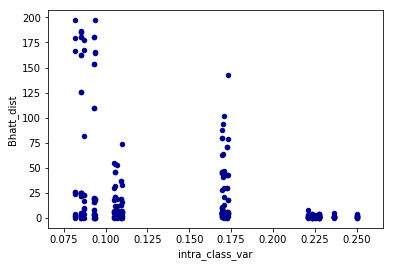

In [69]:
cond1=trial_df['intra_class_var']>0.0
cond2=trial_df['intra_class_var']<5

trl_df_filter=trial_df.loc[(cond1)&(cond2),:]
ax1 = trl_df_filter.plot.scatter(x='intra_class_var',y='Bhatt_dist',c='DarkBlue')

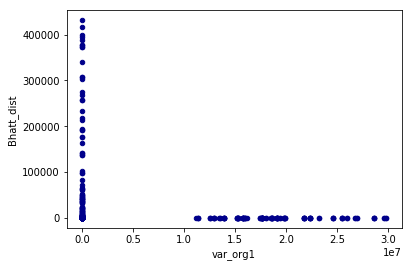

In [189]:
ax1 = trial_df.plot.scatter(x='var_org1',
...                       y='Bhatt_dist',
...                       c='DarkBlue')

In [ ]:
column_vals=['Organ1','Organ2',
             'window_size','Offset',
             'Angle','Texture property',
             'Bhattacharrya distance']
trl_df=pd.DataFrame(final_list_data,columns=column_vals)
trl_df.hist(column='Bhattacharrya distance')

In [ ]:
trl_df.sort_values(by='Bhattacharrya distance',ascending=False)

In [5]:
def get_org_class_stat(img,mask,organ_int):
    """The purpose of this method is to evaluate where it is
    Nan and where it is value is to be return"""
    trl_img=np.where(mask==organ_int,img,"Nan")
    return (np.nanmean(trl_img),np.nanvar(trl_img))

In [6]:
def weighted_variance(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- #Numpy ndarrays with the same shape.
    """

    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return variance

In [7]:
def analyze_text_img_region(arr_1,mask,distances,theta,props,window):
    """ANalysing patch for batcharrya distance and wasserstein distance"""
    i=-1
    data_bs=[]
    mask_intensities={0:'Background',63:'Liver',126:'r_kidney',189:'l_kidney',252:'spleen'}
    for no1,dist in enumerate(distances):

        for no2,angle in enumerate(theta):

            for no3,properties in enumerate(props):
                i+=1
                tmp_arr1=arr_1[:,:,i]
                slic_var=np.var(tmp_arr1)
                #Getting mask information
                region_mask_vals=np.unique(mask)
                #really ugly dict comprehension
                org_in_mask={org_val:org_int_key for org_int_key,org_val in mask_intensities.items() if org_int_key in region_mask_vals}
                print_bhatt=False
                #Getting conditional average and variance for bhattacharyya distance
                for org_name,int_val in org_in_mask.items():
                    tmp_weights=mask==int_val
                    cond_avrg=np.average(tmp_arr1,
                               weights=(tmp_weights))
                    cond_var=weighted_variance(tmp_arr1,
                                               tmp_weights)

                    org_in_mask[org_name]=[cond_avrg,cond_var]
                #Getting organ combinations for bhattdist
                org_combos=list(itertools.combinations(list(org_in_mask.keys()),
                                                       2)) 
                
                for vals in org_combos:
                              
                    tmp_bhat_dist=bhatt_dist_approx_stat_summary(org_in_mask[vals[0]],
                                                                 org_in_mask[vals[1]])
                    
                #tmp_emd_dist=Wasserstein_dist(tmp_arr1_norm,tmp_arr2_norm)
                #Appending information to new database
                    file_name=list(vals)+org_in_mask[vals[0]]+org_in_mask[vals[1]]+[window,dist,angle,properties,
                                                                                    tmp_bhat_dist,slic_var]
                    data_bs.append(file_name)
                
    return data_bs
        

In [8]:
def get_org_spec_text_img_region_raw_data(arr_1,mask):
    """returning general dictionary of each organ array """
    mask_intensities={0:'Background',63:'Liver',126:'r_kidney',189:'l_kidney',252:'spleen'}

    #Getting mask information
    region_mask_vals=np.unique(mask)
    #really ugly dict comprehension to get dictionary of organs in mask. 
    org_in_mask={org_val:org_int_key for org_int_key,org_val in mask_intensities.items() if org_int_key in region_mask_vals}
    print_bhatt=False
    #Getting conditional average and variance for bhattacharyya distance
    for org_name,int_val in org_in_mask.items():
        
        tmp_arr=arr_1[mask==int_val]

        org_in_mask[org_name]=tmp_arr.flatten()


    return org_in_mask
        

In [187]:

#Setting file types and grounds. 
file_set_keys=[x for x in list(file_dict.keys()) if x.find('_texture images')!=-1]
ground_set_keys=[x for x in list(file_dict.keys()) if x.find('_ground')!=-1]
file_type=['t2spir']#'t1dual',
windows=['win_3','win_5','win_7','win_9','win_11']
data_bs=[]

#Iterating through the windows
for wind in windows:
    
    i=-1
    #Iterating through to different distances, angles and properties. 
    for no1,dist in enumerate(distances):

        for no2,angle in enumerate(theta):

            for no3,properties in enumerate(props):
                
                i+=1
                final_file_list=[]
                for file_keys in file_set_keys:
                    #ipdb.set_trace()
                    #Getting image type iterating through and getting image types 
                    det_img_type=[x for x in file_type if x in file_keys.lower()]
                    
                    if len(det_img_type)>0:
                        
                        #Getting ground key for associated file type. 
                        grnd_dict_key=[x for x in ground_set_keys if x.find(det_img_type[0])!=-1]

                        #Getting ground file name substrings
                        grnd_f_basenames=get_file_name_only(file_dict[grnd_dict_key[0]])

                        #Changing file name structure to suit outphase numbering
                        if file_keys.find('_outphase')!=-1:
                            file_grnd_dict=gen_grnd_dict_link(file_dict[grnd_dict_key[0]])
                        else:
                            file_grnd_dict=dict(zip(grnd_f_basenames,file_dict[grnd_dict_key[0]]))


                        #Getting file locations of file types that match ground requirements
                        unfilt_file_list=file_dict[file_keys]
                        #Getting specific files given str conditions of window size and ground file name
                        filt_file_list=get_spec_file_set(unfilt_file_list,
                                                         [file_grnd_dict.keys(),[wind]])
                        #Generate tuple set of images for set based on file input
                        tmp_tuple_set=gen_mask_file_tuple_list(file_grnd_dict,
                                                               filt_file_list)
                        #Creating master dictionary
                        mast_arr_dict={'Background':np.array([]),'Liver':np.array([]),'r_kidney':np.array([]),
                                       'l_kidney':np.array([]),'spleen':np.array([])}
                        
                        #Getting specific file set that match substring requirements
                        for mask_f,file_f in tmp_tuple_set:
                            #Loading data into array for analysis
                            mask_f_arr=imageio.imread(mask_f)
                            file_f_arr=np.load(file_f,allow_pickle=True)

                            file_f_arr_spec=file_f_arr[:,:,i]

                            tmp_f_arr_dict=get_org_spec_text_img_region_raw_data(file_f_arr_spec,mask_f_arr)

                            mast_arr_dict=merge_org_to_org_dict(mast_arr_dict,tmp_f_arr_dict)
                        
                        #Computer summary statistics on dataset
                        for orgs,org_arr in mast_arr_dict.items():
                            tmp_var=org_arr.var()
                            tmp_mean=org_arr.mean()
                            mast_arr_dict[orgs]=[tmp_mean,tmp_var]
                            
                        org_combos=list(itertools.combinations(list(mast_arr_dict.keys()),
                                                       2)) 
                        
                        #ipdb.set_trace()
                        
                        for vals in org_combos:

                            tmp_bhat_dist=bhatt_dist_approx_stat_summary(mast_arr_dict[vals[0]],
                                                                         mast_arr_dict[vals[1]])

                        #tmp_emd_dist=Wasserstein_dist(tmp_arr1_norm,tmp_arr2_norm)
                        #Appending information to new database
                            file_name=list(vals)+mast_arr_dict[vals[0]]+mast_arr_dict[vals[1]]+[wind,dist,angle,properties,
                                                                                            tmp_bhat_dist]
                            data_bs.append(file_name)
                        


In [ ]:
trial_df=pd.DataFrame(data_bs,columns=['Organ1','Organ2','mean_org1','var_org1',
                                              'mean_org2','var_org2','window_size','offset',
                                              'angle','property','Bhatt_dist'])

trial_df['org_to_org']=trial_df["Organ1"].map(str) +'_to_'+ trial_df["Organ2"]


trial_df[~trial_df['window_size'].isin(['win_3','win_5'])].sort_values('Bhatt_dist',ascending=False)
#trial_df.to_excel('pat_1_t2spir_slc_19_wind_5_bhatt_dist_wrt_ofs_angle_prop_30sep19.xlsx')

In [12]:
import re

In [213]:
trial_df.to_excel('pat_1_t2spir_slc_19_26_wind_5_to_11_bhatt_dist_wrt_ofs_angle_prop_01Oct19.xlsx')

In [10]:
trial_df=pd.read_excel('pat_1_t2spir_slc_19_26_wind_5_to_11_bhatt_dist_wrt_ofs_angle_prop_01Oct19.xlsx')

In [17]:
trial_df['window_int'] = [''.join(re.findall("\d*\.?\d+", item)) for item in trial_df['window_size']]
trial_df['window_int'] = pd.to_numeric(trial_df['window_int'])

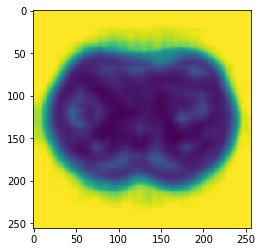

In [35]:
trl_arr=np.load('text_img_pat_id_1_win_11_16lvl_IMG-0002-00021_t2spir_dicom_anon_grey_levels.npy')

plt.imshow(trl_arr[:,:,5])
plt.savefig('low_variance_texture_img_lvl_16_IMG-0002-00021_wind_11_ASM.png')

In [18]:
trial_df['window_int'].dtype

dtype('int64')

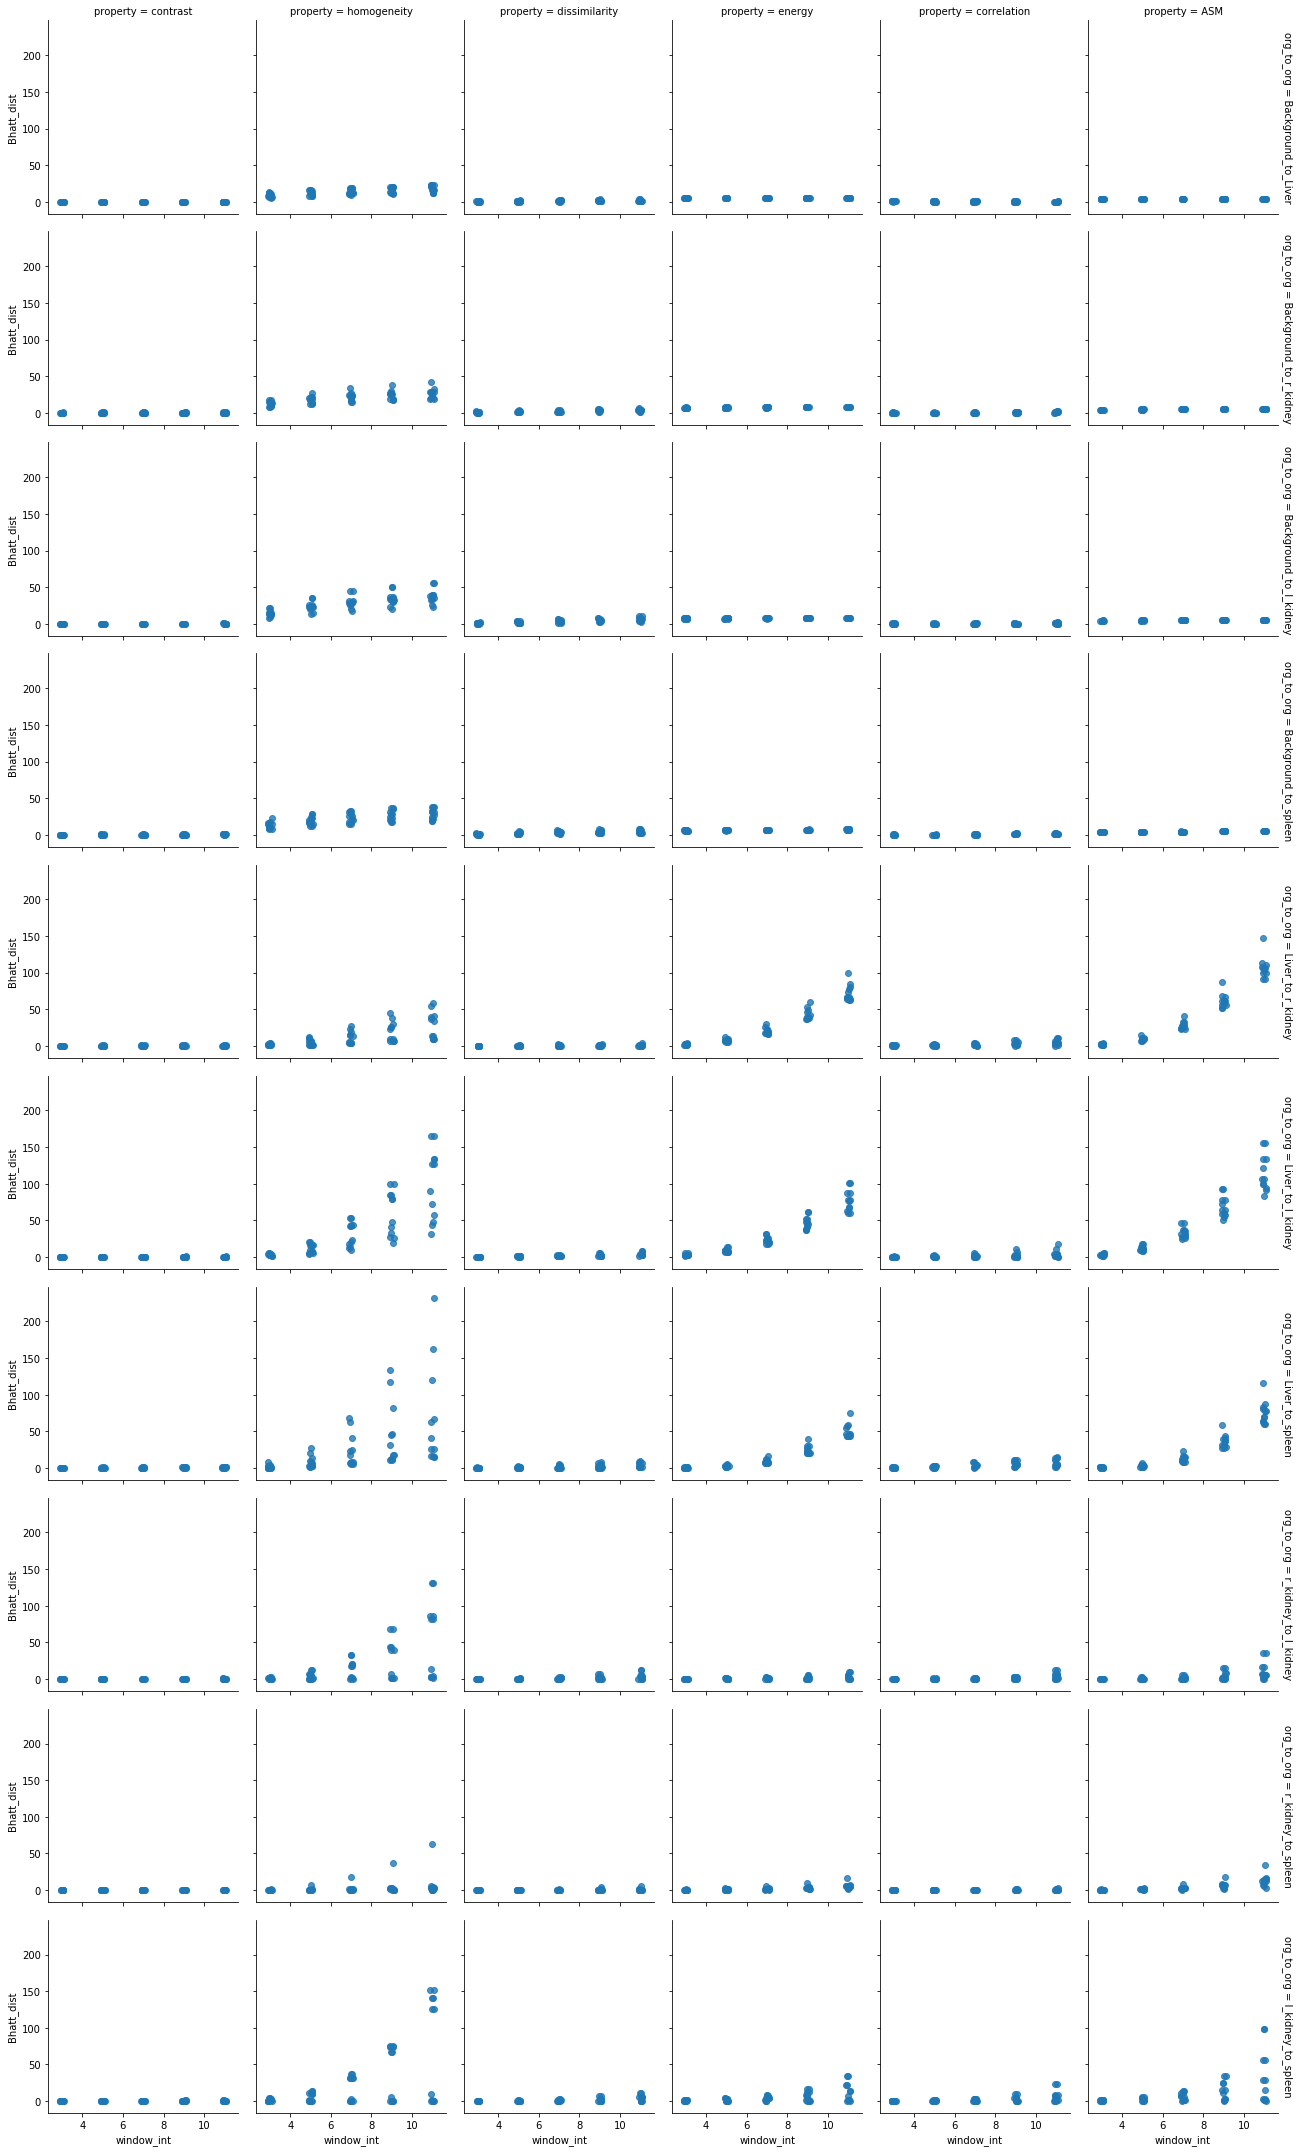

In [26]:
#plt.figure(figsize=(20,))
g = sns.FacetGrid(trial_df, row='org_to_org', col='property', margin_titles=True)
g.map(sns.regplot,'window_int','Bhatt_dist', fit_reg=False, x_jitter=.1)
plt.savefig('facet_plot_window_size_org_prop_bhatt_dist.jpeg', dpi=900)

[Text(0,0,'contrast'),
 Text(0,0,'homogeneity'),
 Text(0,0,'dissimilarity'),
 Text(0,0,'energy'),
 Text(0,0,'correlation'),
 Text(0,0,'ASM')]

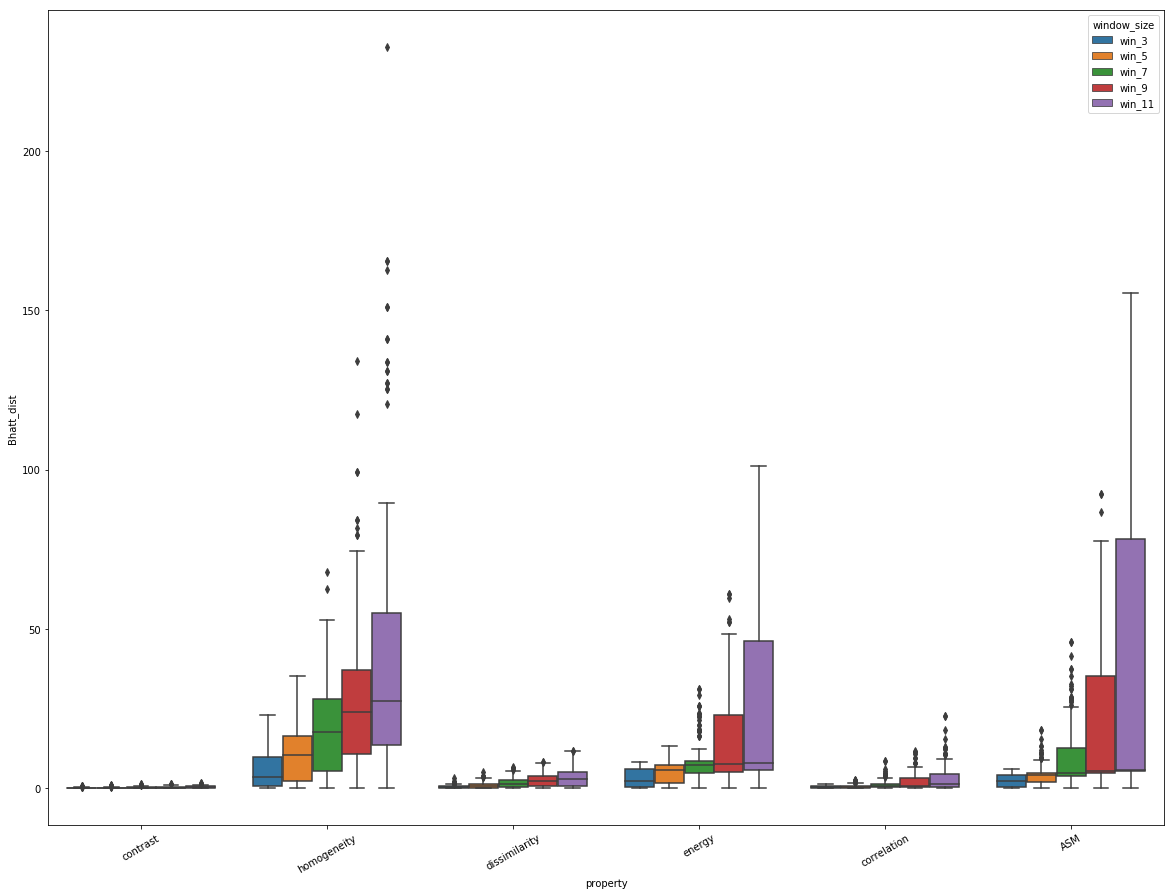

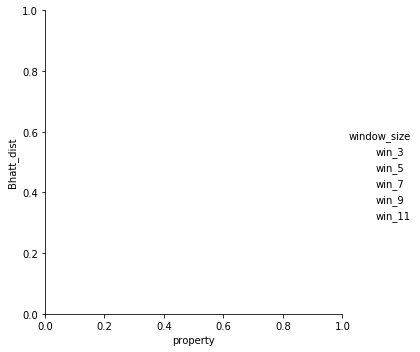

In [211]:

fig, ax1 = plt.subplots(figsize=(20,15))
sns.catplot(ax=ax1,x='property',y='Bhatt_dist',hue='window_size',kind='box',data=trial_df)#,hue='property'

ax1.set_xticklabels(ax1.get_xticklabels(),rotation=30)

In [146]:
def gen_grnd_dict_link(file_dict_grnd,int_length=5):
    """The purpose of this method is to generate a pairing string set value set
    for comparing t1 dual inphase and outphase files during analysis"""
    #Getting file base names 
    file_dict_grnd_bnames=[os.path.splitext(os.path.basename(x))[0] for x in sorted(file_dict_grnd)]
    #converting file name to general dictionary
    file_dict_grnd_conv=[x.split('-') for x in file_dict_grnd_bnames]
    
    #convert final file type with str conversions
    file_dict_grnd_conv2=[str(int(x[-1])-1) for x in file_dict_grnd_conv]
    
    #Add trailing zeros to values
    file_dict_grnd_conv3=[x.zfill(int_length) for x in file_dict_grnd_conv2]
    
    
    #appending new enumerate value to dictionary
    for idx,new_num in enumerate(file_dict_grnd_conv3):
        
        file_dict_grnd_conv[idx][-1]=new_num
        file_dict_grnd_conv[idx]='-'.join(file_dict_grnd_conv[idx])
    
    return dict(zip(file_dict_grnd_conv,file_dict_grnd))

In [31]:
def get_file_name_only(file_path_list: list) -> list:
    """The purpose of this method is to get the base file name from the file path in the list object inputted
    by the user"""
    file_ret_list=[]
    
    for vals in file_path_list:
        file_str_tmp=os.path.splitext(os.path.basename(vals))[0]
        file_ret_list.append(file_str_tmp)
    
    return file_ret_list

In [32]:
def get_spec_file_set(file_list: list,cond_str: list) -> list:
    """The purpose of this method is to only return files that match all conditional string pattern"""
    
    for trl_cond in cond_str:
        
        tmp_list=[x for x in file_list if any(x.find(y)!=-1 for y in trl_cond)]
    
    return tmp_list

In [167]:
def gen_mask_file_tuple_list(mask_dict: dict,file_list: list) -> list:
    """The purpose of this method is to return the ground for each associated image in the file list in the form of a tuple"""
    
    final_tuple_lst=[]
    
    file_cntr=len(file_list)
                
    for file_key,file_path in mask_dict.items():
        #Getting the actual file 
        tmp_act_file=[x for x in file_list if file_key in x]

        #If one matching file found proceed to next step. 
        if len(tmp_act_file)==1:
            file_cntr-=1
            final_tuple_lst.append((file_path,tmp_act_file[0]))
        elif len(tmp_act_file)>1:
            print('more than one file ground match file found:',tmp_act_file)
            break
        else:
            continue
            
    if file_cntr>0:
        print('Error not all ground files found')
            
    return final_tuple_lst

In [184]:
def merge_org_to_org_dict(mast_dict,tmp_dict):
    """The purpose of this method is to merge organ specific dictionaries for analysis"""
    
    for mast_dict_key,mast_dict_vals in mast_dict.items():
        #Concatenating two dictionary values together
        try:
            mast_dict[mast_dict_key]=np.concatenate((tmp_dict[mast_dict_key],mast_dict_vals))
        except KeyError as e:
            print('Master key not present in temporary array:',mast_dict_key)
        
    return mast_dict

In [183]:
def bhatt_dist_approx_stat_summary(stat_sum_1,stat_sum_2):
    """The purpose of this method is to find stat sums using summary statsitics. """
    var_arr_1=stat_sum_1[1]
    var_arr_2=stat_sum_2[1]
    mean_arr_1=stat_sum_1[0]
    mean_arr_2=stat_sum_2[0]
    
    BD_eqn_pt_1=0.25*math.log(0.25*(((var_arr_1**2)/var_arr_2**2)+((var_arr_2**2)/var_arr_1**2)+2))
    #if BD_eqn_pt_1>4.311902e+05:
        #print('variance 1:',var_arr_1)
        #print('variance 2:',var_arr_2)
        #print('result:',0.25*(((var_arr_1**2)/var_arr_2**2)+((var_arr_2**2)/var_arr_1**2)+2))
        
        
    BD_eqn_pt_2=0.25*(((mean_arr_1-mean_arr_2)**2)/((var_arr_1**2)+(var_arr_2**2)))
    #
    
    return BD_eqn_pt_1+BD_eqn_pt_2